<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [9]:
print (boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

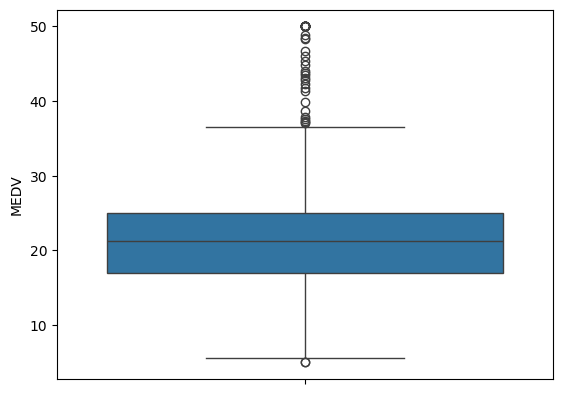

In [10]:
#For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y='MEDV', data = boston_df)

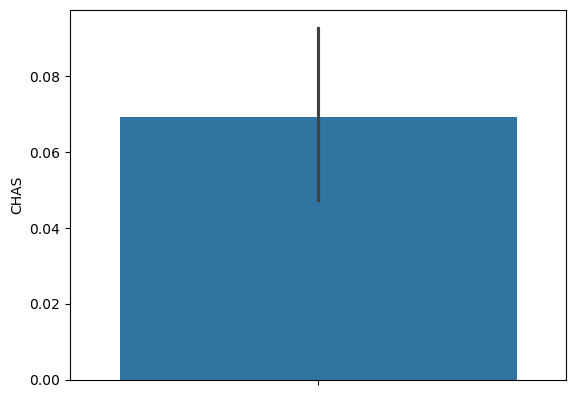

In [14]:
# Provide a  bar plot for the Charles river variable

ax = sns.barplot( y ='CHAS', data = boston_df)

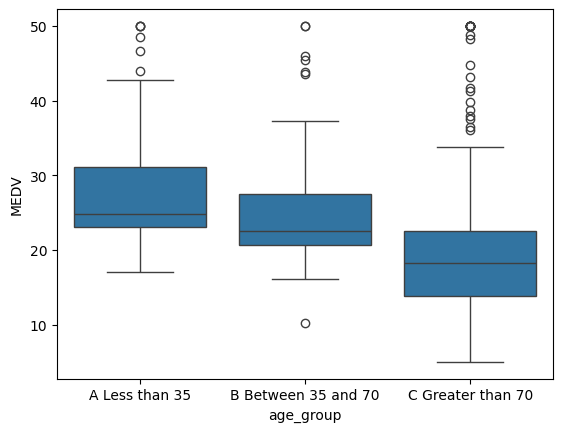

In [32]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <=35), 'age_group'] = 'A Less than 35'
boston_df.loc[(boston_df['AGE'] >35) & (boston_df['AGE'] <=70), 'age_group'] = 'B Between 35 and 70'
boston_df.loc[(boston_df['AGE'] >70), 'age_group'] = 'C Greater than 70'

order = ['A Less than 35','B Between 35 and 70','C Greater than 70']

less35 = boston_df[boston_df['age_group'] == 'A Less than 35']['MEDV']
bw3570 = boston_df[boston_df['age_group'] == 'B Between 35 and 70']['MEDV']
greater70 = boston_df[boston_df['age_group'] == 'C Greater than 70']['MEDV']
# print(boston_df)
ax = sns.boxplot(y='MEDV', x='age_group', data = boston_df, order= order)

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

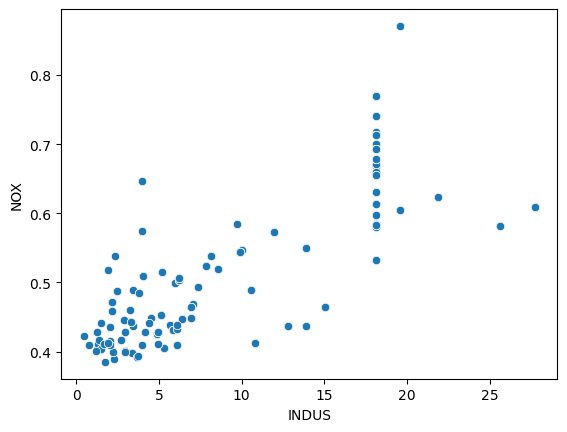

In [40]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

ax = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
# scipy.stats.pearsonr()
# scipy.stats.pearsonr(x = boston_df['INDUS'], y = boston_df['NOX'])
#The correlation is strong positive

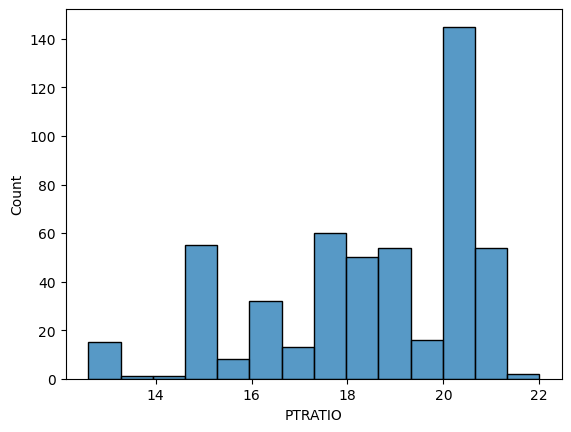

In [42]:
# Create a histogram for the pupil to teacher ratio variable
ax = sns.histplot(data = boston_df['PTRATIO'])


In [45]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0 ]['MEDV'])
# p values is very low so less than reasonable alpha so reject the null meaning yes significant difference is there between median house values bounded by charles or not


TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [54]:
## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# Alpha : 0.05
# H0: There is no diff between MEDV and AGE

boston_df.loc[(boston_df['AGE'] >=84), 'Older1940'] = 1
boston_df.loc[(boston_df['AGE'] <84), 'Older1940'] = 0
boston_df
Older1940 = boston_df[(boston_df['Older1940'] ==1)]['MEDV']
NotOlder1940 = boston_df[(boston_df['Older1940'] ==0)]['MEDV']

scipy.stats.f_oneway(Older1940, NotOlder1940)
# as p value is very low , we reject null and so yes there is a differnece in the mean values

F_onewayResult(statistic=71.334018088109, pvalue=3.2403818036980184e-16)

In [56]:
## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# H0: There is no relation beween NOX and INDUS
# alpha is 0.05
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# the pvalue is much lower than alpha thus we reject the H0 and conclude that there is relation beween NOX and INDUS

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [58]:
## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
# H0:
# Alpha: 0.05
# H0: There is no impact of DIS to MEDV

x = boston_df['DIS']
Y = boston_df['MEDV']

X = sm.add_constant(x)
model = sm.OLS(Y, X).fit()
pred = model.predict(X)
model.summary()

# as Prob(F statistic) is lower than alpha, we reject H0 and conclude there is a relationship between dis and medv. 
# As te rsquared is 0.062 we concluce that the relation is weak positive linear

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 07 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        18:38:49   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""